In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load stereo images
left_img = cv2.imread('E:/ARK PERCEPTION/SL_2/left.png',cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('E:/ARK PERCEPTION/SL_2/right.png',cv2.IMREAD_GRAYSCALE)

# Preprocess images if necessary
# e.g., resize, denoise, etc.

# Calculate disparity map
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(left_img, right_img)

# Convert disparity to depth
baseline = 2.0  # Assume baseline distance between cameras (in meters)
focal_length = 2.0  # Assume focal length of cameras (in pixels)
depth = baseline * focal_length / (disparity + 1e-6)

# Normalize depth map
depth_normalized = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX)

# Generate depth map visualization
depth_colormap = cv2.applyColorMap(depth_normalized.astype(np.uint8), cv2.COLORMAP_JET)

# Save depth map
cv2.imwrite('E:/ARK PERCEPTION/SL_2/depth.png', depth_colormap)

True

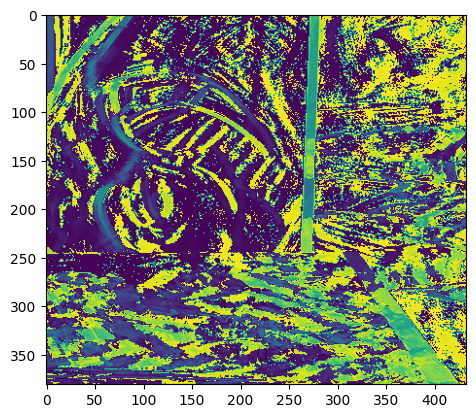

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_contour_angle(contour):
    # Calculate the orientation of the minimum bounding rectangle
    _, _, angle = cv2.minAreaRect(contour)
    return angle

# Load stereo images
left_img = cv2.imread('E:/ARK PERCEPTION/SL_2/left.png', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('E:/ARK PERCEPTION/SL_2/right.png', cv2.IMREAD_GRAYSCALE)
NewImg= left_img -right_img
plt.imshow(NewImg)
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Preprocess images if necessary
# e.g., resize, denoise, etc.



In [ ]:
# Detect edges using Canny edge detection
left_edges = cv2.Canny(left_img, 100, 200)
right_edges = cv2.Canny(right_img, 100, 200)

# Find contours in the edge images
left_contours, _ = cv2.findContours(left_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
right_contours, _ = cv2.findContours(right_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

threshold_angle = 10 

# Compare the angles of contours between left and right images
for left_contour in left_contours:
    left_angle = calculate_contour_angle(left_contour)
    for right_contour in right_contours:
        right_angle = calculate_contour_angle(right_contour)
        if abs(left_angle - right_angle) > threshold_angle:
            print("Angular difference detected:", abs(left_angle - right_angle))

# Function to calculate the angle of a contour
def calculate_contour_angle(contour):
    # Calculate the orientation of the minimum bounding rectangle
    _, _, angle = cv2.minAreaRect(contour)
    return angle